In [16]:
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
source = 'series_train.parquet'

df = pd.read_parquet(source)
display(df)

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0,0.021536,0.022214,-1.022370,0.022853,-88.280762,0.0,53.000000,4188.000000,56940000000000,4,3,41.0,00115b9f
1,1,0.022005,0.022187,-1.019740,0.020231,-88.241707,0.0,51.666668,4188.166504,56945000000000,4,3,41.0,00115b9f
2,2,0.022240,0.022005,-1.019401,0.019893,-88.170067,0.0,50.333332,4188.333496,56950000000000,4,3,41.0,00115b9f
3,3,0.021589,0.022578,-1.018177,0.018667,-88.250031,0.0,50.500000,4188.500000,56955000000000,4,3,41.0,00115b9f
4,4,0.022005,0.023763,-1.014323,0.016848,-88.130775,0.0,33.166668,4181.000000,57235000000000,4,3,41.0,00115b9f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314569144,398995,0.234029,-0.009520,0.993087,0.020346,76.694092,0.0,0.000000,3098.833252,52115000000000,3,1,324.0,ffed1dd5
314569145,398996,0.233796,-0.009803,0.993204,0.020409,76.693787,0.0,0.000000,3098.666748,52120000000000,3,1,324.0,ffed1dd5
314569146,398997,0.233900,-0.009610,0.993113,0.020342,76.693100,0.0,0.000000,3098.500000,52125000000000,3,1,324.0,ffed1dd5
314569147,398998,0.234016,-0.009584,0.992762,0.020028,76.693352,0.0,0.000000,3098.333252,52130000000000,3,1,324.0,ffed1dd5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314569149 entries, 0 to 314569148
Data columns (total 14 columns):
 #   Column               Dtype   
---  ------               -----   
 0   step                 uint32  
 1   X                    float32 
 2   Y                    float32 
 3   Z                    float32 
 4   enmo                 float32 
 5   anglez               float32 
 6   non-wear_flag        float32 
 7   light                float32 
 8   battery_voltage      float32 
 9   time_of_day          int64   
 10  weekday              int8    
 11  quarter              int8    
 12  relative_date_PCIAT  float32 
 13  id                   category
dtypes: category(1), float32(9), int64(1), int8(2), uint32(1)
memory usage: 15.2 GB


In [20]:
# There seems to be a lot of entries where the device was not on, but not so many in comparison to the overall number
# We can keep this entry and see if there's a correlation between these values and the SSI

print(df[df['non-wear_flag'] == 0].shape)
print(df[df['non-wear_flag'] == 1].shape)

print(df[df['non-wear_flag'].between(0, 1, inclusive='neither')].shape)

(226122397, 14)
(82524637, 14)
(5922115, 14)


In [21]:
# There are no null values in this dataset, which makes our work a bit easier

for col in df.columns:
    print(col, df[col].isna().sum())

step 0
X 0
Y 0
Z 0
enmo 0
anglez 0
non-wear_flag 0
light 0
battery_voltage 0
time_of_day 0
weekday 0
quarter 0
relative_date_PCIAT 0
id 0


In [22]:
# Convert nanoseconds to seconds and extract hours, minutes, seconds
df['seconds'] = df['time_of_day'].astype(int) / 1e9

# Convert the seconds to time of day using datetime.time
df['time_of_day'] = df['seconds'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(seconds=x)).time())

df = df.drop(columns=['step', 'X', 'Y', 'Z', 'anglez', 'battery_voltage', 'seconds'])

In [23]:
display(df)

,enmo,non-wear_flag,light,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0.022853,0.0,53.000000,15:49:00,4,3,41.0,00115b9f
1,0.020231,0.0,51.666668,15:49:05,4,3,41.0,00115b9f
2,0.019893,0.0,50.333332,15:49:10,4,3,41.0,00115b9f
3,0.018667,0.0,50.500000,15:49:15,4,3,41.0,00115b9f
4,0.016848,0.0,33.166668,15:53:55,4,3,41.0,00115b9f
...,...,...,...,...,...,...,...,...
314569144,0.020346,0.0,0.000000,14:28:35,3,1,324.0,ffed1dd5
314569145,0.020409,0.0,0.000000,14:28:40,3,1,324.0,ffed1dd5
314569146,0.020342,0.0,0.000000,14:28:45,3,1,324.0,ffed1dd5
314569147,0.020028,0.0,0.000000,14:28:50,3,1,324.0,ffed1dd5


In [24]:
result = df.groupby('id').agg({
    'enmo': ['mean', 'median'],
    'non-wear_flag': ['mean', 'median'],
    'light': ['mean', 'median']
})

result.columns = ['_'.join(col) for col in result.columns]
result.reset_index(inplace=True)

display(result)

/var/folders/md/j2f882mn1vl7cb0f7l2mmkjh0000gp/T/ipykernel_12445/3491830584.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('id').agg({


,id,enmo_mean,enmo_median,non-wear_flag_mean,non-wear_flag_median,light_mean,light_median
0,00115b9f,0.047388,0.023637,0.000000,0.0,42.296310,6.926828
1,001f3379,0.011926,0.009831,0.655708,1.0,16.771980,0.879005
2,00f332d1,0.030255,0.006382,0.171246,0.0,66.563393,7.172273
3,01085eb3,0.032946,0.008127,0.035210,0.0,17.800735,6.677332
4,012cadd8,0.058280,0.010466,0.000000,0.0,54.893402,7.059160
...,...,...,...,...,...,...,...
991,fe9c71d8,0.043686,0.022665,0.137257,0.0,7.297878,3.500000
992,fecc07d6,0.002962,0.001934,0.939101,1.0,50.648312,1.181806
993,ff18b749,0.053595,0.014763,0.000000,0.0,94.217117,4.000000
994,ffcd4dbd,0.028601,0.008805,0.020323,0.0,22.480034,5.282995


delete from here

In [25]:
df = pd.read_csv('train.csv')
print(df.shape)
print(len(df['id'].unique()))

(3960, 82)
3960


In [26]:
display(df)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


delete until here

In [27]:
merge_table = pd.read_csv('train.csv')[['id', 'BIA-BIA_Activity_Level_num', 'SDS-SDS_Total_T', 'PCIAT-PCIAT_Total', 'sii']]

new_df = pd.merge(left=result, right=merge_table, how='left', on='id')

In [28]:
correlation_matrix = new_df.corr().abs()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: could not convert string to float: '00115b9f'

In [ ]:
# It seems that the amount of movement has a correlation with the value of sii
# Also, the non-wear_flag has a high corelation with enmo,
# which makes sense and it might be unnecessary to have this column

new_df.corr()

/var/folders/md/j2f882mn1vl7cb0f7l2mmkjh0000gp/T/ipykernel_79838/2209897252.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,enmo_mean,enmo_median,non-wear_flag_mean,non-wear_flag_median,light_mean,light_median,BIA-BIA_Activity_Level_num,SDS-SDS_Total_T,PCIAT-PCIAT_Total,sii
enmo_mean,1.000000,0.854668,-0.701932,-0.595290,0.485629,0.024358,-0.010847,-0.035706,-0.223629,-0.205348
enmo_median,0.854668,1.000000,-0.570361,-0.436308,0.371648,0.080422,-0.023182,-0.019374,-0.172526,-0.155682
non-wear_flag_mean,-0.701932,-0.570361,1.000000,0.912742,-0.325307,0.009954,0.106387,-0.002312,0.116704,0.116949
non-wear_flag_median,-0.595290,-0.436308,0.912742,1.000000,-0.277499,0.018094,0.090979,0.011766,0.102887,0.106370
light_mean,0.485629,0.371648,-0.325307,-0.277499,1.000000,0.285997,-0.016572,-0.022788,-0.085371,-0.083179
light_median,0.024358,0.080422,0.009954,0.018094,0.285997,1.000000,0.014051,0.025123,0.043764,0.041550
BIA-BIA_Activity_Level_num,-0.010847,-0.023182,0.106387,0.090979,-0.016572,0.014051,1.000000,-0.014004,0.141052,0.089021
SDS-SDS_Total_T,-0.035706,-0.019374,-0.002312,0.011766,-0.022788,0.025123,-0.014004,1.000000,0.197681,0.182497
PCIAT-PCIAT_Total,-0.223629,-0.172526,0.116704,0.102887,-0.085371,0.043764,0.141052,0.197681,1.000000,0.894937
sii,-0.205348,-0.155682,0.116949,0.106370,-0.083179,0.041550,0.089021,0.182497,0.894937,1.000000


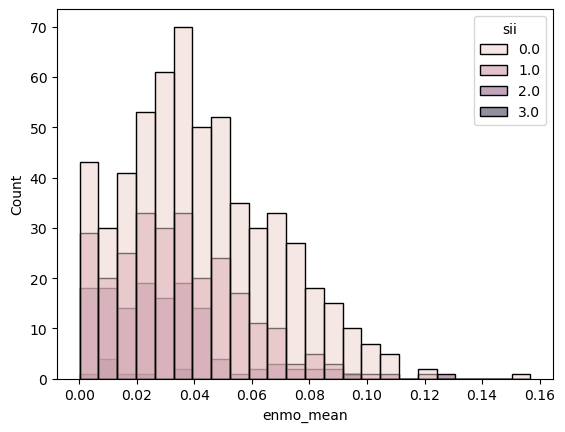

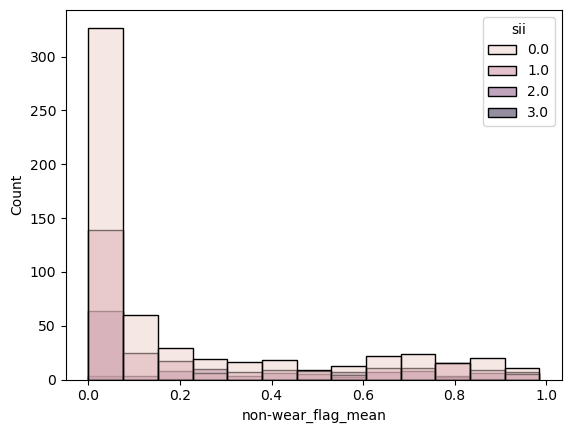

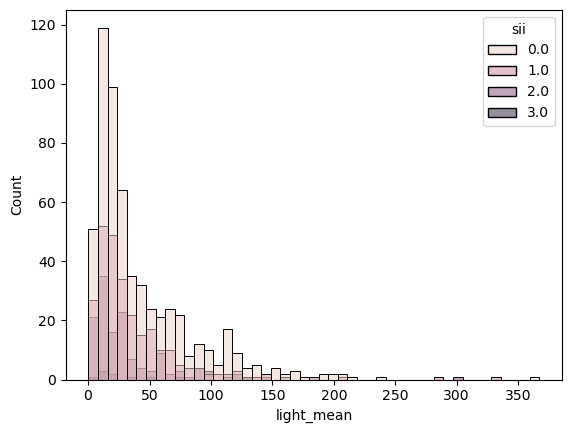

In [43]:
columns_to_display = ['enmo_mean', 'non-wear_flag_mean', 'light_mean']

for col in columns_to_display:
    sns.histplot(new_df, x=col, hue='sii')
    plt.show()

In [ ]:
relevant_columns = ['enmo_mean', 'non-wear_flag_mean', 'light_mean']

X = new_df[relevant_columns]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
pca_results = pca.fit_transform(data_scaled)

In [ ]:
pca.explained_variance_ratio_

array([0.675017], dtype=float32)

In [ ]:
new_df['pca_1'] = pca_results[:, 0]

In [ ]:
new_df.corr().abs()

/var/folders/md/j2f882mn1vl7cb0f7l2mmkjh0000gp/T/ipykernel_79838/1913243968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr().abs()


,enmo_mean,enmo_median,non-wear_flag_mean,non-wear_flag_median,light_mean,light_median,PCIAT-PCIAT_Total,sii,pca_1,pca_2,pca_3
enmo_mean,1.000000,0.854668,0.701932,0.595290,0.485629,0.024358,0.223629,0.205348,9.085988e-01,1.467205e-01,3.910514e-01
enmo_median,0.854668,1.000000,0.570361,0.436308,0.371648,0.080422,0.172526,0.155682,7.492690e-01,1.510896e-01,3.879676e-01
non-wear_flag_mean,0.701932,0.570361,1.000000,0.912742,0.325307,0.009954,0.116704,0.116949,8.437792e-01,4.266473e-01,3.255899e-01
non-wear_flag_median,0.595290,0.436308,0.912742,1.000000,0.277499,0.018094,0.102887,0.106370,7.430889e-01,3.994683e-01,3.541476e-01
light_mean,0.485629,0.371648,0.325307,0.277499,1.000000,0.285997,0.085371,0.083179,6.982377e-01,7.065019e-01,1.154093e-01
light_median,0.024358,0.080422,0.009954,0.018094,0.285997,1.000000,0.043764,0.041550,1.053932e-01,2.885026e-01,7.434477e-02
PCIAT-PCIAT_Total,0.223629,0.172526,0.116704,0.102887,0.085371,0.043764,1.000000,0.894937,1.784006e-01,3.171713e-02,1.454557e-01
sii,0.205348,0.155682,0.116949,0.106370,0.083179,0.041550,0.894937,1.000000,1.695449e-01,3.025264e-02,1.198334e-01
pca_1,0.908599,0.749269,0.843779,0.743089,0.698238,0.105393,0.178401,0.169545,1.000000e+00,3.373075e-08,1.892992e-07
pca_2,0.146721,0.151090,0.426647,0.399468,0.706502,0.288503,0.031717,0.030253,3.373075e-08,1.000000e+00,1.858415e-07
